# Analyse du Data set : Bike Sharing Demand

In [159]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [160]:
df = pd.read_csv('../csv/train.csv')

**datetime** - hourly date + timestamp  

**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of total rentals

In [161]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [162]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [163]:
df.shape

(10886, 12)

In [164]:
df.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [166]:
df['dates'] = pd.to_datetime(df['datetime']).dt.date
df['months'] = pd.to_datetime(df['datetime']).dt.month
df['hours'] = pd.to_datetime(df['datetime']).dt.hour

In [167]:
years= ['2010', '2011', '2012']
spring = ['03-21', '06-21']
summer = ['06-21', '09-21']
fall = ['09-21', '12-21']
winter = ['12-21', '03-21']
seasons = [spring, summer, fall, winter]
for year in years:
    compteur = 0
    for season in seasons:
        compteur += 1
        start = year + '-' + season[0]
        if season[1] != '03-21':
            end = year + '-' + season[1]
        else:
            end = str(int(year)+1) + '-' + season[1]
        df.loc[((df['dates'] >= pd.to_datetime(start)) & (df['dates'] < pd.to_datetime(end))), 'season'] = compteur

In [168]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  dates       10886 non-null  object        
 13  months      10886 non-null  int64         
 14  hours       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10), object(1)
memory usage: 1

In [169]:
# samedi : 2011-01-01 (= 6)
df['days'] = (df['dates'] - df['dates'].min()).dt.days + 6
df['week_days'] = df['days'] % 7
df[df['week_days'] == 0] = 7
df = df.drop('days', axis=1)

In [170]:
# Heat index (indice de chaleur) ; en degré celsius
c1 = -42.379
c2 = 2.04901523
c3 = 10.14333127
c4 = -0.22475541
c5 = -6.83783e-3
c6 = -5.481717e-2
c7 = 1.22874e-3
c8 = 8.5282e-4
c9 = -1.99e-6
T = 1.8*df['temp']+32
R = df['humidity']
df['HI'] = c1 + c2*T + c3*R + c4*T*R + c5*pow(T,2) + c6*pow(R,2) + c7*pow(T,2)*R + c8*T*pow(R,2) + c9*pow(T,2)*pow(R,2)
# Reconversion de HI en degrés celsius
df['HI'] = (df['HI'] - 32)*(5/9)
# df.loc[df['temp'] < 14, 'HI'] = df['temp']

<AxesSubplot:xlabel='atemp', ylabel='temp'>

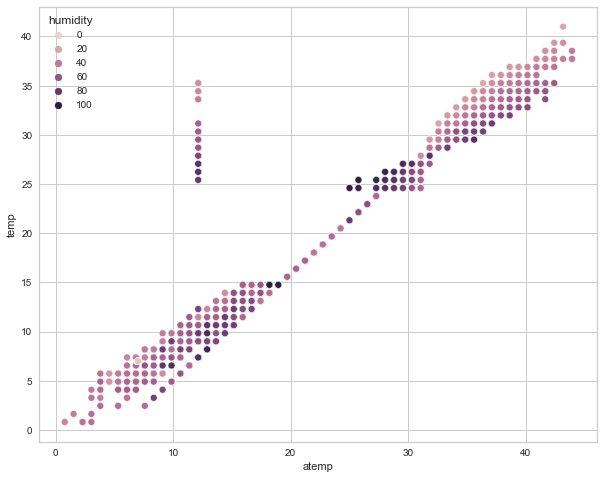

In [171]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='atemp', y='temp', hue='humidity', data=df)

In [172]:
# des données aberrantes à supprimer
df = df[~((df['temp'] > 20) & (df['atemp'] < 18))]

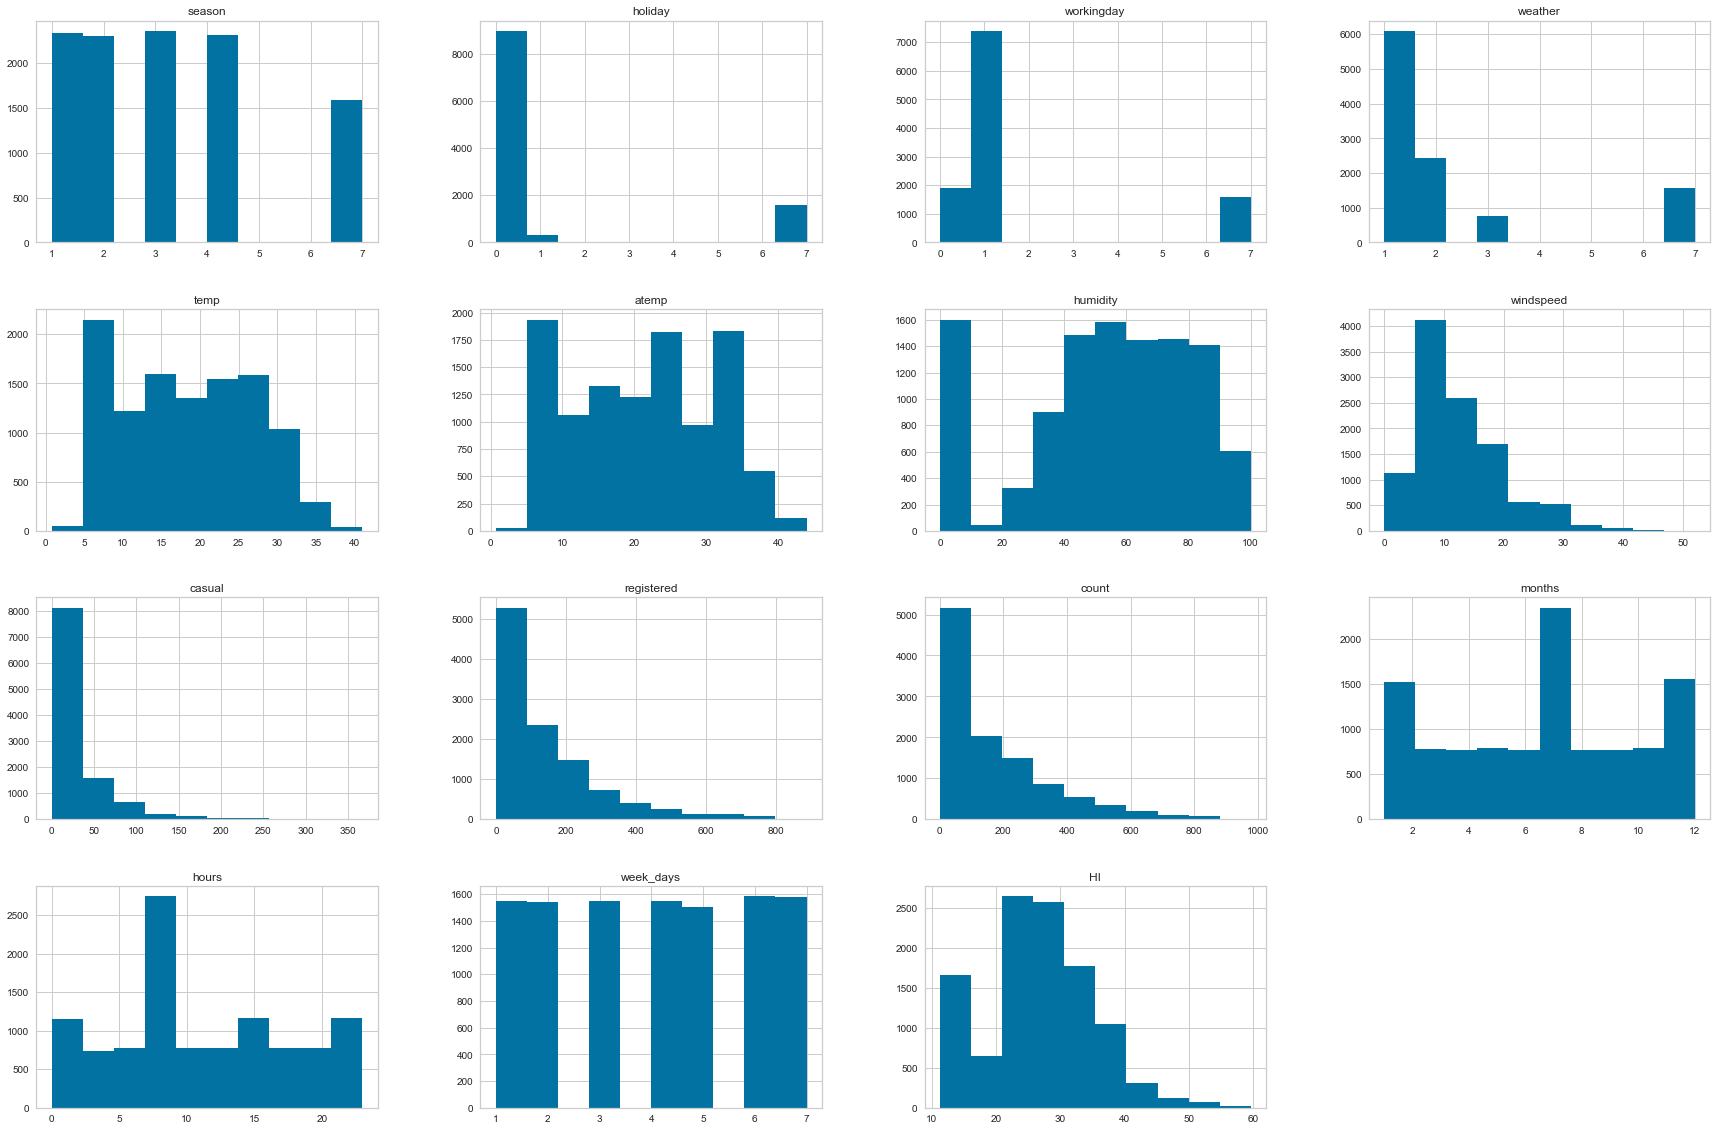

In [173]:
df.hist(figsize=(30,20))
plt.show()

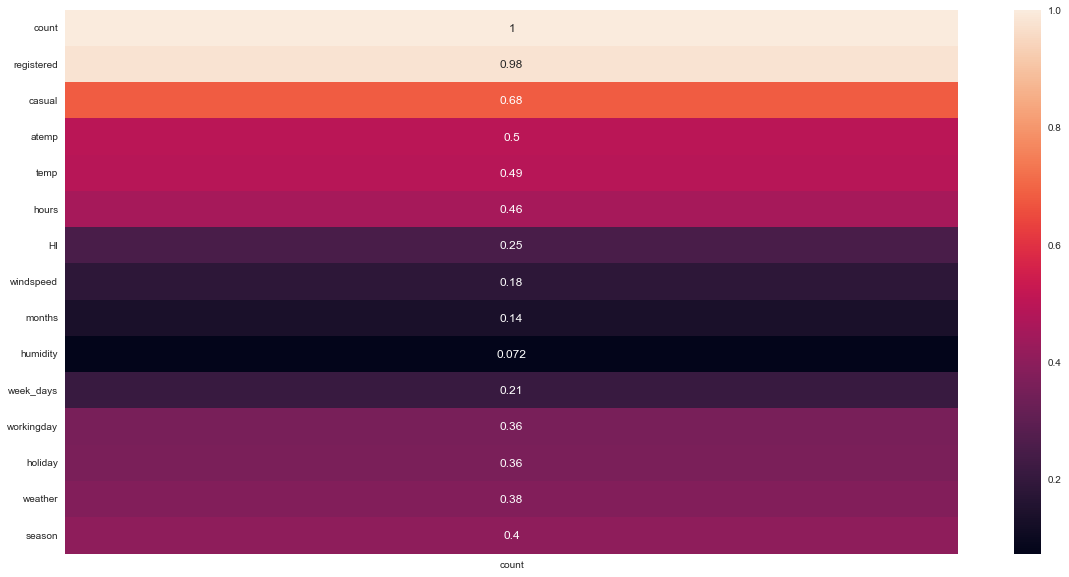

In [174]:
plt.figure(figsize=(20,10))
sns.heatmap(np.abs(df.corr()[['count']].sort_values('count', ascending=False)), annot=True)
plt.show()

Text(0, 0.5, 'count')

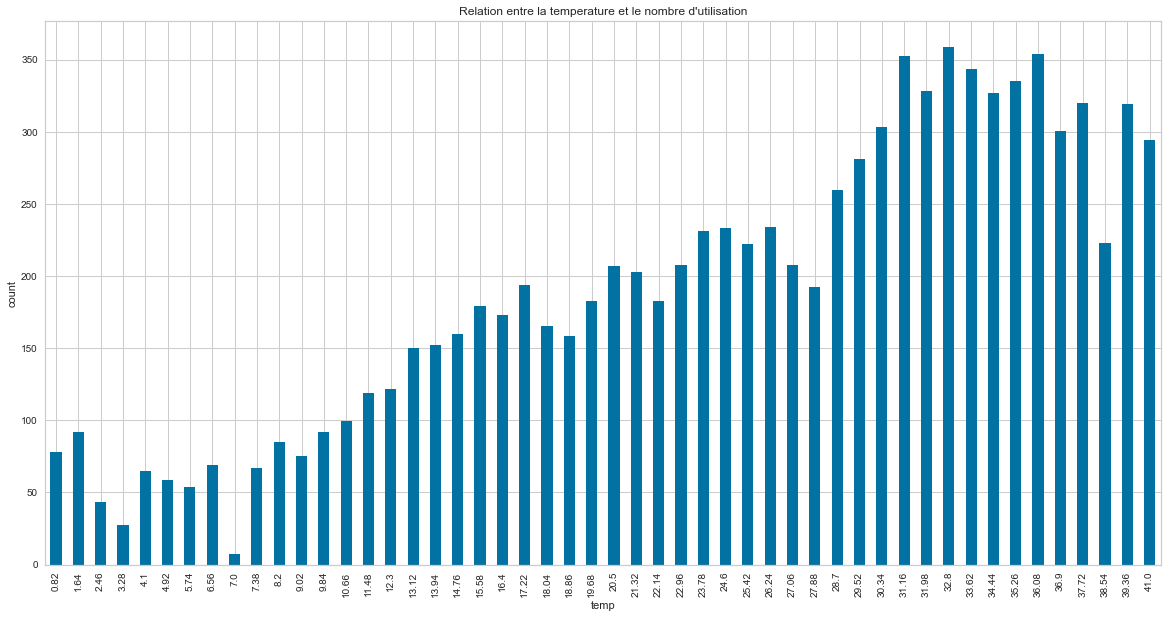

In [175]:
df.groupby('temp').mean()['count'].plot.bar(figsize=(20,10))
plt.title("Relation entre la temperature et le nombre d'utilisation")
plt.ylabel("count")

Text(0, 0.5, 'count')

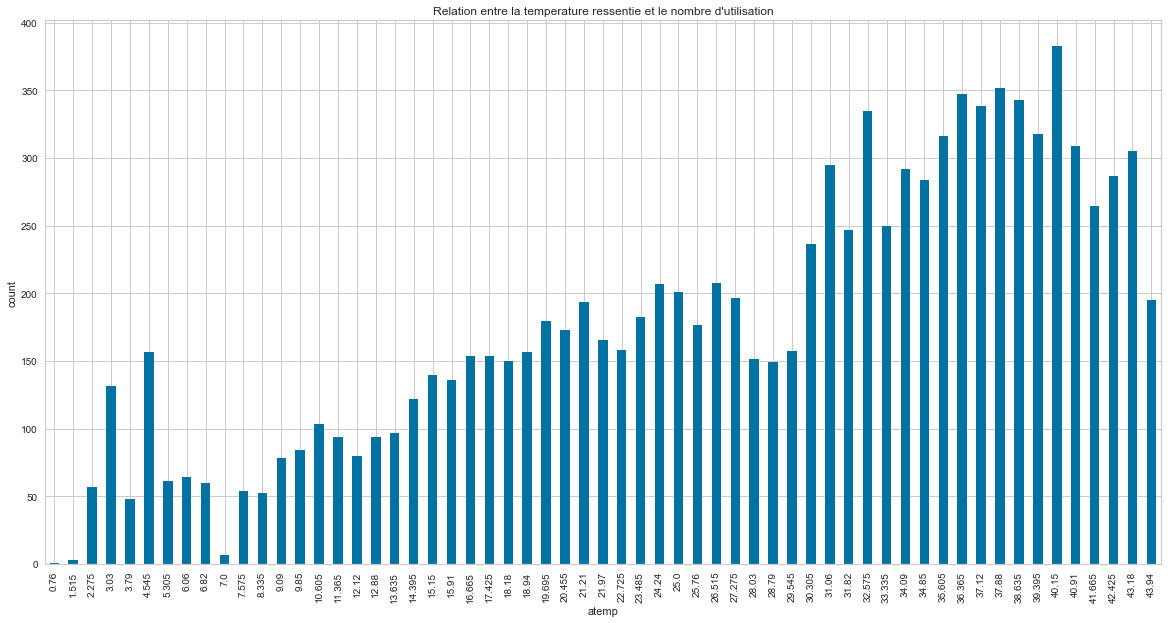

In [176]:
df.groupby('atemp').mean()['count'].plot.bar(figsize=(20,10))
plt.title("Relation entre la temperature ressentie et le nombre d'utilisation")
plt.ylabel("count")

Text(0, 0.5, 'count')

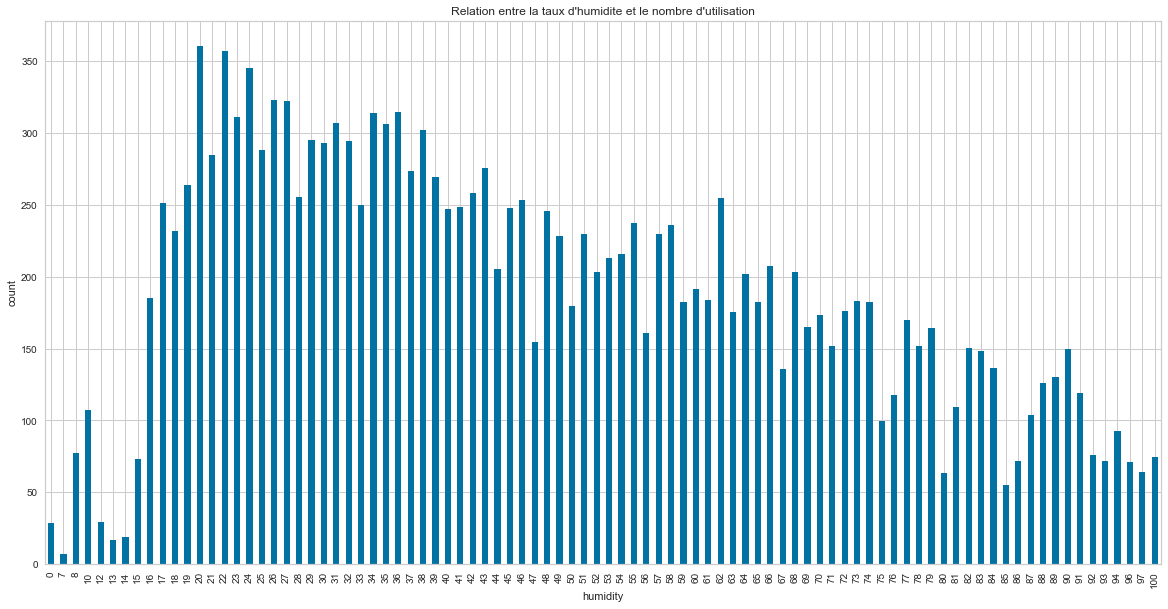

In [177]:
df.groupby('humidity').mean()['count'].plot.bar(figsize=(20,10))
plt.title("Relation entre la taux d'humidite et le nombre d'utilisation")
plt.ylabel("count")

Text(0, 0.5, 'count')

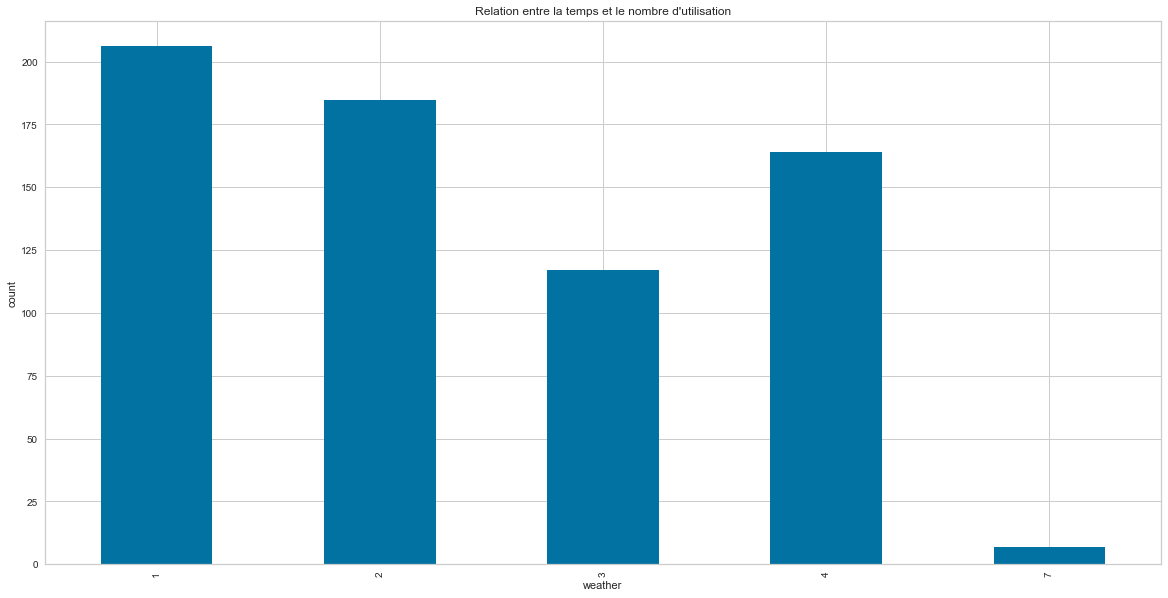

In [178]:
df.groupby('weather').mean()['count'].plot.bar(figsize=(20,10))
plt.title("Relation entre la temps et le nombre d'utilisation")
plt.ylabel("count")

Text(0, 0.5, 'count')

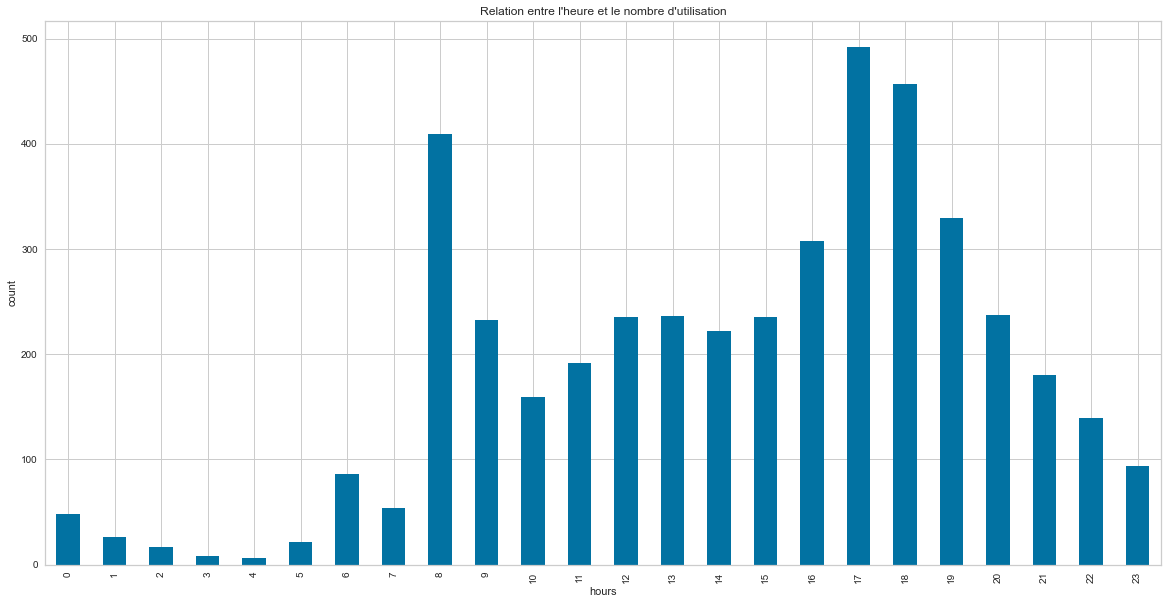

In [179]:
df.groupby('hours').mean()['count'].plot.bar(figsize=(20,10))
plt.title("Relation entre l'heure et le nombre d'utilisation")
plt.ylabel("count")

Text(0, 0.5, 'count')

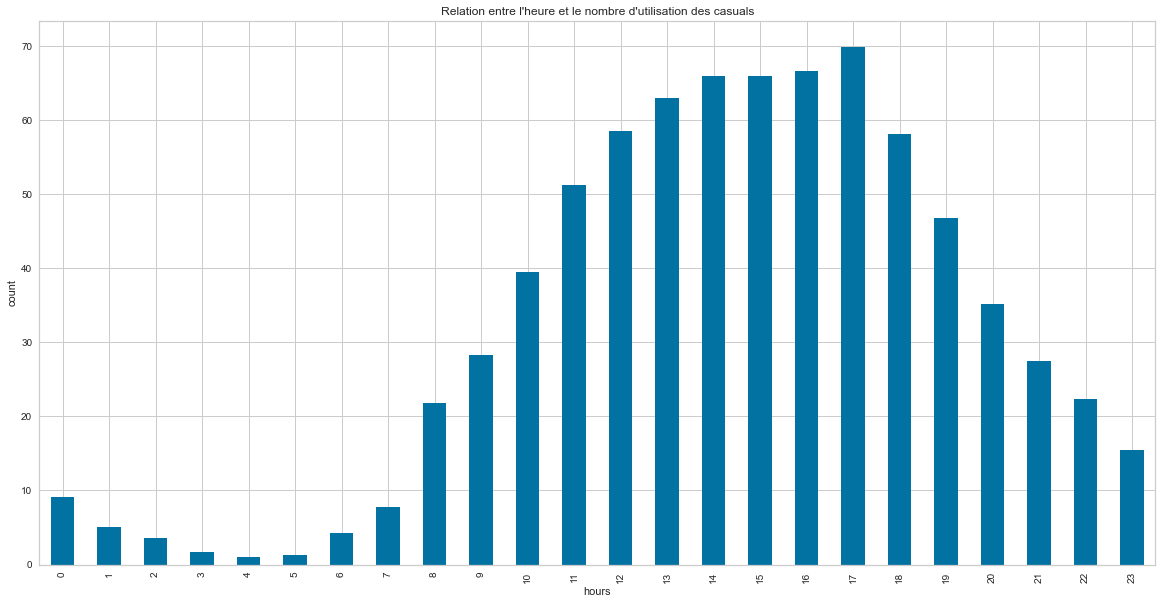

In [180]:
df.groupby('hours').mean()['casual'].plot.bar(figsize=(20,10))
plt.title("Relation entre l'heure et le nombre d'utilisation des casuals")
plt.ylabel("count")

Text(0, 0.5, 'count')

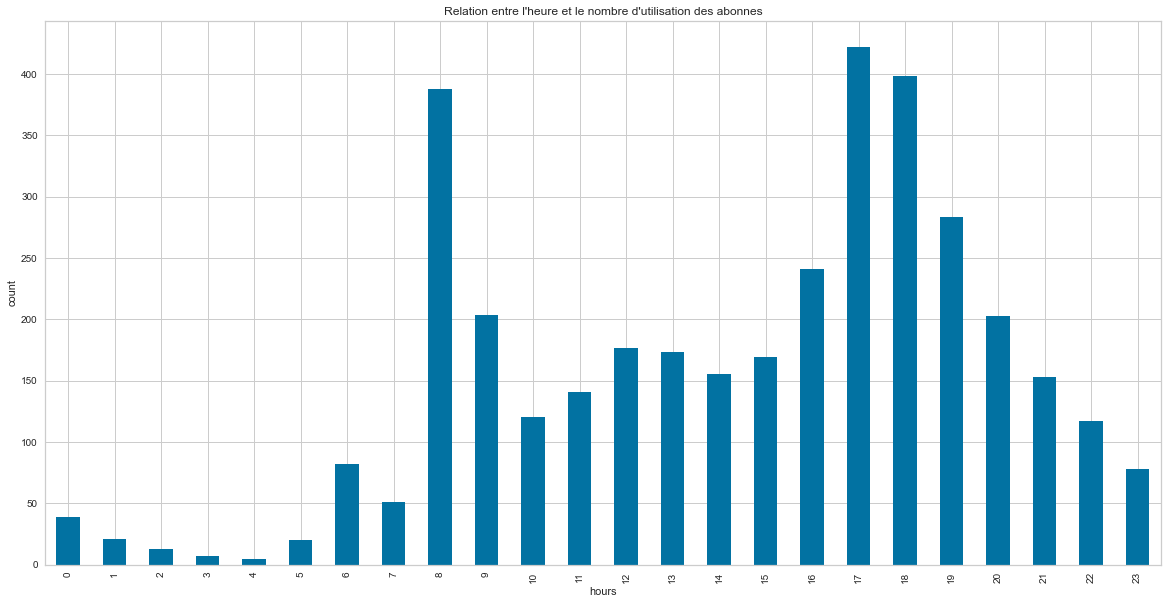

In [181]:
df.groupby('hours').mean()['registered'].plot.bar(figsize=(20,10))
plt.title("Relation entre l'heure et le nombre d'utilisation des abonnes")
plt.ylabel("count")

Text(0, 0.5, 'count')

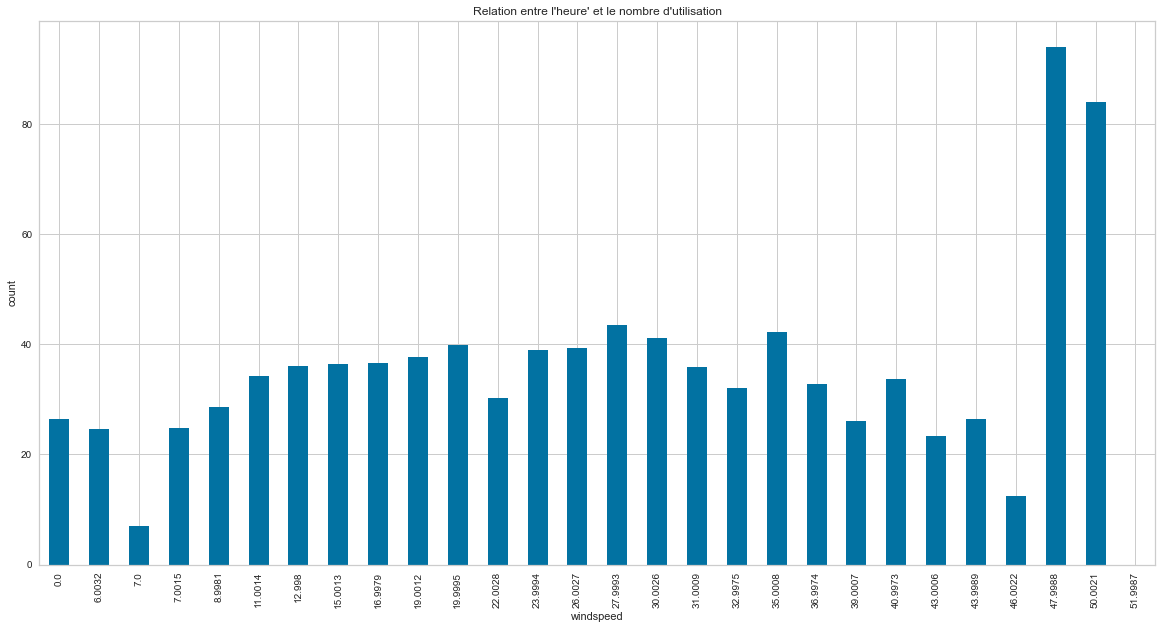

In [182]:
df.groupby('windspeed').mean()['casual'].plot.bar(figsize=(20,10))
plt.title("Relation entre l'heure' et le nombre d'utilisation")
plt.ylabel("count")

Text(0, 0.5, 'count')

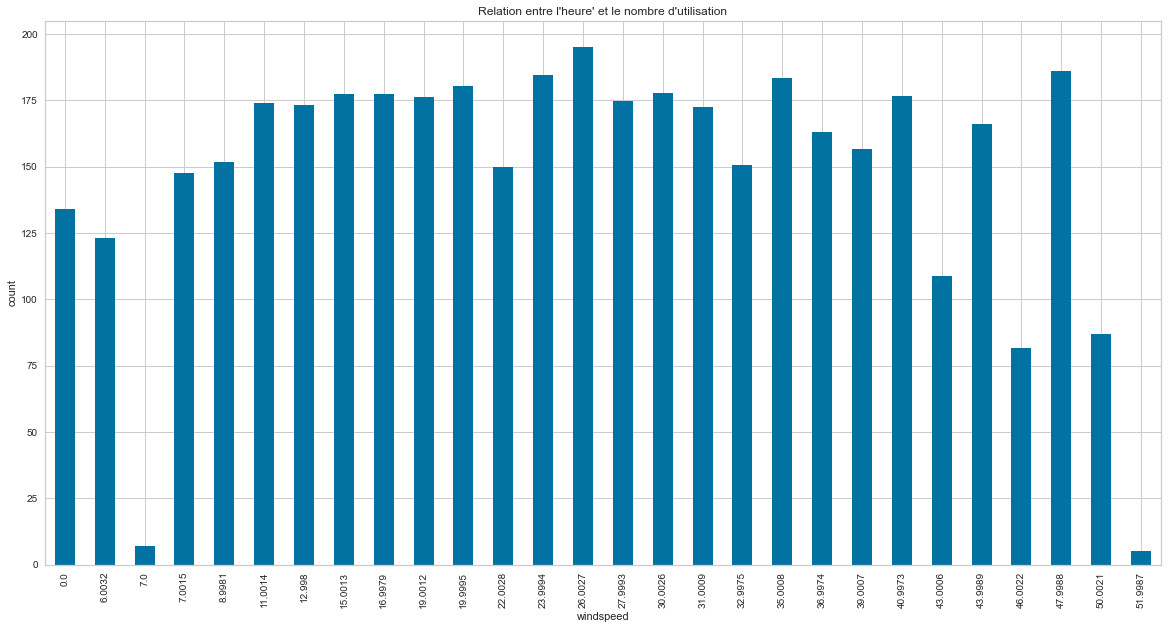

In [183]:
df.groupby('windspeed').mean()['registered'].plot.bar(figsize=(20,10))
plt.title("Relation entre l'heure' et le nombre d'utilisation")
plt.ylabel("count")

In [184]:
df = df.drop('datetime', axis=1)

## Modele test

In [185]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [186]:
df_train_modify = pd.read_csv('../csv/train_modifie_mickael.csv')
df_test_modify = pd.read_csv('../csv/test_modifie_mickael.csv')

In [187]:
df_train_modify.head(1)

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,months,hours,week_days,HI
0,0,4,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,6,9.84


In [188]:
df_test_modify.head(1)

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,months,hours,week_days,HI
0,9063,2,0,0,1,30.34,34.09,62,7.0015,22,146,168,9,0,6,33.933541


In [189]:
df_train = df_train_modify.drop(['Unnamed: 0', 'count'], axis=1)
df_test = df_test_modify.drop(['Unnamed: 0', 'count'], axis=1)

In [190]:
X_train = df_train.drop(['registered', 'casual'], axis=1)
y_train_registered = df_train['registered']
y_train_casual = df_train['casual']

In [191]:
X_test = df_test.drop(['registered', 'casual'], axis=1)
y_test_registered = df_test['registered']
y_test_casual = df_test['casual']

In [192]:
#Choix des features pour X et la target y
# y = df['count']
# X = df.drop(['count','casual','registered','dates'], axis = 1)

# #On decoupe notre X et train test avec train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=5)
# #Apercu de X
# X

In [193]:
# #Model: Random Forest
# forest=RandomForestRegressor(n_estimators=20,
#                              max_depth=10,
#                              criterion='mse',
#                             )

# #Features et pipelines
# scaled_features = ['temp', 'atemp', 'humidity', 'windspeed', 'hours', 'HI'] 
# scaled_pipeline = make_pipeline(RobustScaler()) 
# encoded_features = ['season','weather','workingday', 'holiday', 'week_days']
# encoded_pipeline = make_pipeline(OneHotEncoder())


# #preprocessing et main pipeline
# preprocessing = make_column_transformer((scaled_pipeline, scaled_features),(encoded_pipeline, encoded_features))
# model = make_pipeline(preprocessing, forest)

# #fit et score
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [194]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dates,months,hours,week_days,HI
0,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,0,6,32.985168


In [195]:
from pycaret.regression import *

In [196]:
df_pycaret = df.drop(['casual','registered', 'dates'], axis=1)

In [197]:
df_pycaret

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,months,hours,week_days,HI
0,4,0,0,1,9.84,14.395,81,0.0000,16,1,0,6,32.985168
1,4,0,0,1,9.02,13.635,80,0.0000,40,1,1,6,35.686332
2,4,0,0,1,9.02,13.635,80,0.0000,32,1,2,6,35.686332
3,4,0,0,1,9.84,14.395,75,0.0000,13,1,3,6,35.312264
4,4,0,0,1,9.84,14.395,75,0.0000,1,1,4,6,35.312264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,3,0,1,1,15.58,19.695,50,26.0027,336,12,19,3,28.300528
10882,3,0,1,1,14.76,17.425,57,15.0013,241,12,20,3,29.039963
10883,3,0,1,1,13.94,15.910,61,15.0013,168,12,21,3,29.830135
10884,3,0,1,1,13.94,17.425,61,6.0032,129,12,22,3,29.830135


In [198]:
s = setup(df_pycaret, target='count')

,Description,Value
0,session_id,4538
1,Target,count
2,Original Data,"(10862, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7603, 12)"


In [199]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,37.3738,3556.4358,59.5690,0.8933,0.4207,0.4247,0.0270
et,Extra Trees Regressor,39.1249,4065.9811,63.6973,0.8779,0.3746,0.3548,0.3300
rf,Random Forest Regressor,39.4850,4145.4371,64.3198,0.8755,0.3777,0.3565,0.4490
gbr,Gradient Boosting Regressor,48.1568,5770.3181,75.8711,0.8269,0.5839,0.7325,0.1340
dt,Decision Tree Regressor,48.7043,7219.8725,84.9185,0.7824,0.4811,0.4054,0.0160
ada,AdaBoost Regressor,84.2834,11788.6899,108.5302,0.6449,1.1280,2.7054,0.0730
knn,K Neighbors Regressor,75.1263,14026.3359,118.3622,0.5786,0.8646,1.7134,0.0280
br,Bayesian Ridge,95.2894,19782.2411,140.5572,0.4068,1.1271,2.7719,0.0080
lar,Least Angle Regression,95.2664,19785.2763,140.5688,0.4067,1.1271,2.7658,0.0110
lasso,Lasso Regression,95.3391,19787.3697,140.5743,0.4067,1.1270,2.7745,0.0140


In [200]:
evaluate_model(best)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [201]:
predictions = predict_model(best, data= df_pycaret)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,32.4230,2658.6553,51.5622,0.9194,0.4062,0.4092


In [202]:
save_model(best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='count',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [203]:
from lightgbm import LGBMRegressor

In [204]:
#Model: LGBM Registered
lgbm = LGBMRegressor(boosting_type='gbdt', class_weight=None,
                    colsample_bytree=1.0, importance_type='split',
                    learning_rate=0.1, max_depth=-1,
                    min_child_samples=20, min_child_weight=0.001,
                    min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                    num_leaves=31, objective=None, random_state=5388,
                    reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                    subsample=1.0, subsample_for_bin=200000,
                    subsample_freq=0)

#Features et pipelines
scaled_features = ['temp', 'atemp', 'humidity', 'windspeed', 'hours', 'HI', 'months'] 
scaled_pipeline = make_pipeline(StandardScaler())
encoded_features = ['season','weather','workingday', 'holiday', 'week_days']
encoded_pipeline = make_pipeline(OneHotEncoder())


#preprocessing et main pipeline
preprocessing = make_column_transformer((scaled_pipeline, scaled_features),(encoded_pipeline, encoded_features))
model = make_pipeline(preprocessing, lgbm)

#fit et score
model.fit(X_train, y_train_registered)
model.score(X_test, y_test_registered)

0.6409582841959844

In [222]:
y_predict_registered = model.predict(X_test)
y_predict_registered

array([24.99982706, 19.55057144, 16.86845394, ...,  7.27526337,
        6.35937567,  3.36268632])

In [216]:
#Model: LGBM Casual
lgbm = LGBMRegressor(boosting_type='gbdt', class_weight=None,
                    colsample_bytree=1.0, importance_type='split',
                    learning_rate=0.1, max_depth=-1,
                    min_child_samples=20, min_child_weight=0.001,
                    min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                    num_leaves=31, objective=None, random_state=5388,
                    reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                    subsample=1.0, subsample_for_bin=200000,
                    subsample_freq=0)

#Features et pipelines
scaled_features = ['temp', 'atemp', 'humidity', 'windspeed', 'hours', 'HI', 'months'] 
scaled_pipeline = make_pipeline(StandardScaler())
encoded_features = ['season','weather','workingday', 'holiday', 'week_days']
encoded_pipeline = make_pipeline(OneHotEncoder())


#preprocessing et main pipeline
preprocessing = make_column_transformer((scaled_pipeline, scaled_features),(encoded_pipeline, encoded_features))
model = make_pipeline(preprocessing, lgbm)

#fit et score
model.fit(X_train, y_train_casual)
model.score(X_test, y_test_casual)

0.7839855968406156

In [223]:
y_predict_casual = model.predict(X_test)
y_predict_casual

array([24.99982706, 19.55057144, 16.86845394, ...,  7.27526337,
        6.35937567,  3.36268632])

In [227]:
(y_predict_casual == y_predict_registered)

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [220]:
#y_pred total
y_predict = y_predict_registered + y_predict_casual
y_predict